In [34]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [35]:
(X_train, y_train ), (X_test,y_test) = mnist.load_data()

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [37]:
X_train[0].shape

(28, 28)

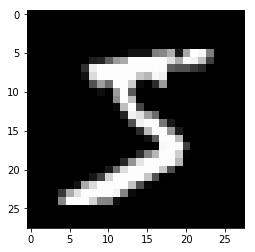

In [38]:
plt.imshow(X_train[0],cmap='gray')

In [39]:
y_train[0]

5

## Preprocessing image data

In [40]:
image_height, image_width = 28,28

In [41]:
X_train = X_train.reshape(60000,image_height*image_width)

In [42]:
X_test = X_test.reshape(10000, image_height*image_width)

In [43]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [44]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [45]:
X_train /= 255.0
X_test /= 255.0

In [46]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [47]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [48]:
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [49]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Model Building

In [51]:
model = Sequential()

In [52]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [55]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 478us/step - loss: 0.1845 - accuracy: 0.9434 - val_loss: 0.0983 - val_accuracy: 0.9695
Epoch 2/20
60000/60000 [==============================] - 28s 462us/step - loss: 0.0810 - accuracy: 0.9752 - val_loss: 0.0911 - val_accuracy: 0.9728
Epoch 3/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 4/20
60000/60000 [==============================] - 27s 458us/step - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.0862 - val_accuracy: 0.9772
Epoch 5/20
60000/60000 [==============================] - 30s 504us/step - loss: 0.0348 - accuracy: 0.9884 - val_loss: 0.0805 - val_accuracy: 0.9785
Epoch 6/20
60000/60000 [==============================] - 30s 504us/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0776 - val_accuracy: 0.9815
Epoch 7/20
60000/60000 [==============================] 

## The accuracy of the model

In [63]:
history.history['accuracy']

[0.94341666,
 0.9752167,
 0.98158336,
 0.98646665,
 0.9884,
 0.9910333,
 0.9924333,
 0.9928833,
 0.99343336,
 0.99473333,
 0.99465,
 0.99588335,
 0.99525,
 0.9960167,
 0.9960833,
 0.99625,
 0.99663335,
 0.99686664,
 0.9959,
 0.9966]

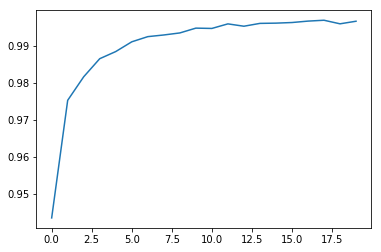

In [64]:
plt.plot(history.history['accuracy'])

## Accuracy of training and validation with loss

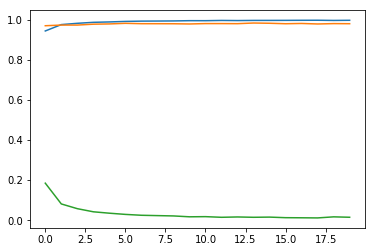

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluation of the model

## Run a Prediction

In [67]:
score = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 109us/step


In [68]:
score

[0.13820259328271975, 0.9796000123023987]

## The nueral network model predicts with an accuracy of 97.96%